Описание соревнования c kaggle:
"Данное тестовое задание состоит в том, чтобы по набору примеров многомерных признаков (trainX) и правильных ответов (trainY) из обучающего множества обучить модель регрессии , которую затем необходимо будет применить к набору примеров признаков из тестового множества (testX) и прислать файл с полученными ответами. Сами признаки никакого осмысленного значения не несут."
"Оценка качества решения будет осуществляться на основе метрики коэффициента детерминации R2"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [3]:
trainX=pd.read_csv('trainX.csv')
trainX=trainX.set_index('Id')
trainX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,,,,,,,,,,,,,,,,,,,,
0,0.929616,0.316376,0.183919,0.328653,0.567725,0.595545,0.964515,0.878482,1.375367,0.653570,0.747715,0.961307,0.016072,0.106444,0.298704,0.656411,0.809813,0.872176,0.964648,0.723685
1,0.642475,0.717454,0.467599,0.523095,0.439645,0.729689,0.994015,0.910353,1.452346,0.170914,0.026849,0.800370,1.731525,0.024676,0.491747,0.526255,0.596366,0.051958,0.895090,0.728266
2,0.818350,0.500223,0.810189,0.154186,0.218950,0.258719,0.468106,0.617828,1.303015,0.178053,0.531450,0.167742,1.473041,0.928171,0.609494,0.150183,0.489627,0.377345,0.848601,0.911097
3,0.414510,0.340697,0.613797,0.325859,0.135894,0.742520,0.863478,0.832987,1.930107,0.684702,0.959388,0.534988,0.727508,0.771282,0.544182,0.243661,0.264543,0.856129,0.534726,0.988190
4,0.945372,0.533232,0.252493,1.158161,0.367439,0.498648,0.226575,0.475524,1.195289,0.312933,0.768735,0.781837,1.633210,0.949906,0.107323,0.910725,0.336055,0.826380,0.898101,0.042715


In [4]:
trainY=pd.read_csv('trainY.csv')
trainY=trainY.set_index('Id')
trainY.head()

,Value
Id,
0,44.362683
1,36.594653
2,31.740323
3,37.311128
4,39.380985


In [5]:
testX=pd.read_csv('testX.csv')
testX=testX.set_index('Id')
testX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,,,,,,,,,,,,,,,,,,,,
0,0.291459,0.911211,0.373766,0.440722,0.285455,0.413261,0.185267,0.147678,0.311755,0.998372,0.901615,0.864756,0.491512,0.211959,0.988927,0.223655,0.550810,0.127422,0.621810,0.113159
1,0.357006,0.579061,0.710015,0.147222,0.981063,0.145149,0.345402,0.710188,0.982723,0.597566,0.050241,0.808759,0.442400,0.187680,0.127501,0.783031,0.076332,0.732982,0.073798,0.467780
2,0.476776,0.392146,0.854501,0.497211,0.422984,0.026728,0.013863,0.097884,0.634058,0.812262,0.494540,0.917595,0.418907,0.542378,0.724625,0.524339,0.384460,0.559312,0.160949,0.120074
3,0.845073,0.473852,0.523079,0.727586,0.141444,0.862143,0.319008,0.086661,0.379124,0.605922,0.083118,0.064470,0.589540,0.473029,0.159687,0.494742,0.985836,0.977376,0.052925,0.492380
4,0.389115,0.947639,0.883561,0.730008,0.351203,0.449038,0.038627,0.619577,0.083770,0.756177,0.975801,0.183528,0.022021,0.241701,0.311813,0.516989,0.768292,0.438643,0.291355,0.653640


Попробуем простую модель

In [6]:
X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.25, random_state=42)
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
r2_score(y_val, y_pred)

0.4025635699070844

Построим графики для каждой из 20 фич:

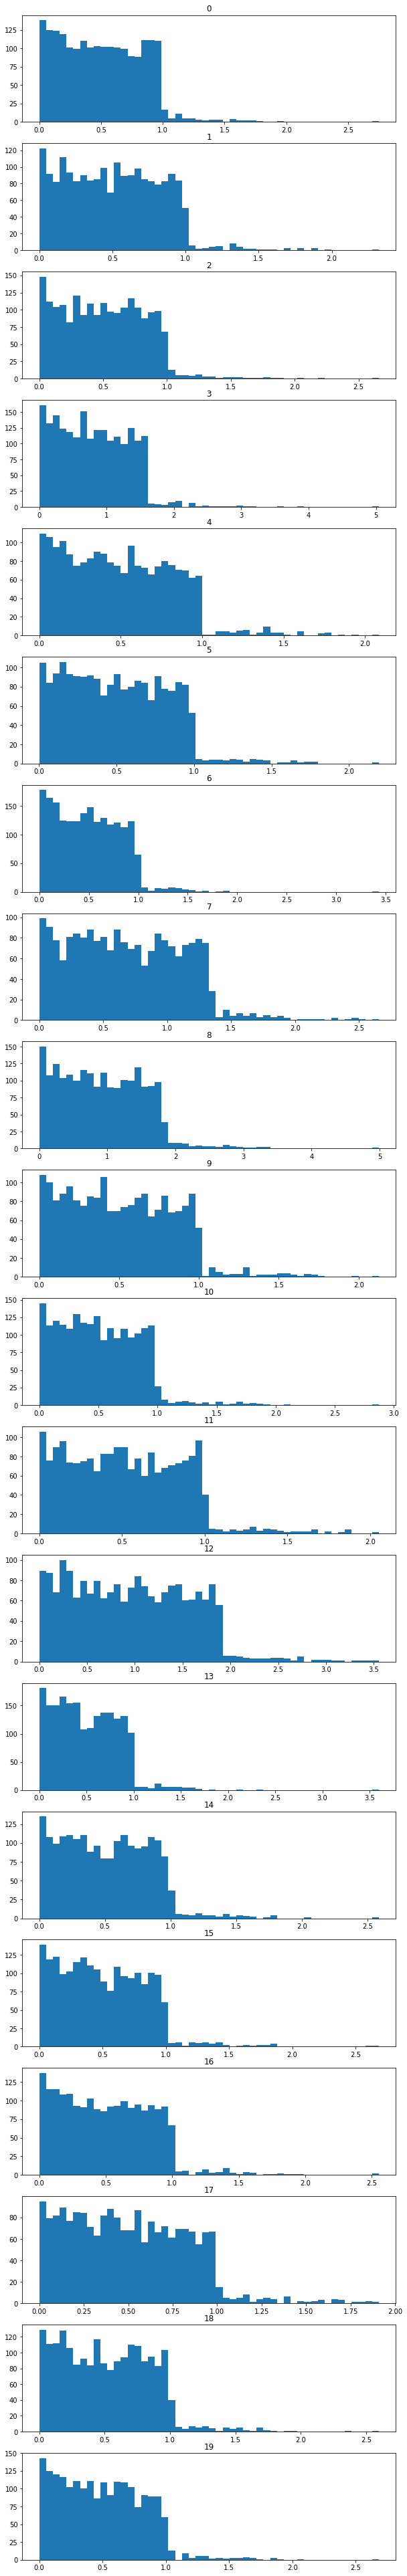

In [7]:
fig, ax = plt.subplots(20, figsize=(10,70))
for i in range(20):
    ax[i].hist(trainX[str(i)], bins=50)
    ax[i].set_title(str(i))

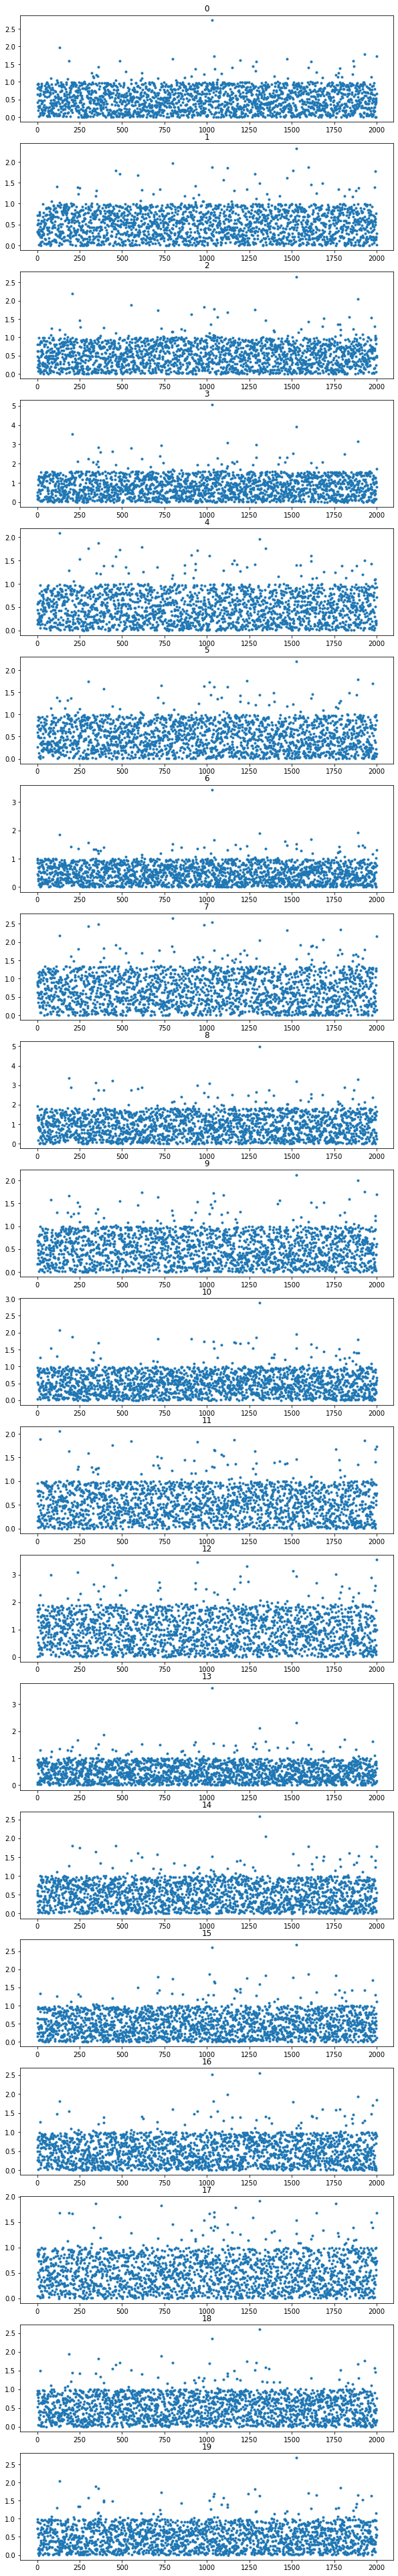

In [8]:
fig, ax = plt.subplots(20, figsize=(10,70))
for i in range(20):
    ax[i].plot(trainX[str(i)], '.')
    ax[i].set_title(str(i))

Видно, что данные в большинстве фич похожи: большинство значений в неком отрезке, чаще всего [0,1]. В каждой фиче есть точки вне отрезка, скорее всего это выбросы. Уберем их и масштабируем фичи так чтоб значения были в отрезке [0,1]

In [9]:
#границы значений для каждой фичи
stripes=[(0,1,2) for i in range(20)]
stripes[3]=(0,1.6,3)
stripes[7]=(0,1.5,2.5)
stripes[8]=(0,1.9,3.5)
stripes[9]=(0,1,1.75)
stripes[12]=(0,2,3.5)
stripes

[(0, 1, 2),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1.6, 3),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1.5, 2.5),
 (0, 1.9, 3.5),
 (0, 1, 1.75),
 (0, 1, 2),
 (0, 1, 2),
 (0, 2, 3.5),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1, 2),
 (0, 1, 2)]

In [10]:
#убираем те строки в которых хоть одно значение выходит за границы
trainX_1stripe=trainX.copy()
index2stripe=list()
for i in range(20):
    index2stripe+=list(trainX_1stripe[trainX_1stripe[str(i)]>stripes[i][1]].index)
index2stripe=list(set(index2stripe))
trainX_1stripe=trainX_1stripe.drop(index=index2stripe)
trainY_1stripe=trainY.drop(index=index2stripe)
trainX_1stripe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Id,,,,,,,,,,,,,,,,,,,,
0,0.929616,0.316376,0.183919,0.328653,0.567725,0.595545,0.964515,0.878482,1.375367,0.653570,0.747715,0.961307,0.016072,0.106444,0.298704,0.656411,0.809813,0.872176,0.964648,0.723685
1,0.642475,0.717454,0.467599,0.523095,0.439645,0.729689,0.994015,0.910353,1.452346,0.170914,0.026849,0.800370,1.731525,0.024676,0.491747,0.526255,0.596366,0.051958,0.895090,0.728266
2,0.818350,0.500223,0.810189,0.154186,0.218950,0.258719,0.468106,0.617828,1.303015,0.178053,0.531450,0.167742,1.473041,0.928171,0.609494,0.150183,0.489627,0.377345,0.848601,0.911097
4,0.945372,0.533232,0.252493,1.158161,0.367439,0.498648,0.226575,0.475524,1.195289,0.312933,0.768735,0.781837,1.633210,0.949906,0.107323,0.910725,0.336055,0.826380,0.898101,0.042715
5,0.195795,0.294501,0.627000,0.138529,0.142945,0.515827,0.689341,1.152108,1.188880,0.581619,0.711116,0.252417,1.724699,0.442294,0.020521,0.959661,0.652225,0.513206,0.682356,0.489540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,0.381120,0.639060,0.978423,1.292915,0.506083,0.767237,0.091458,0.266378,0.012369,0.930050,0.896642,0.089425,1.169188,0.486439,0.686356,0.056294,0.841299,0.670505,0.368902,0.074542
1993,0.365488,0.502715,0.936101,1.249415,0.197236,0.366385,0.835372,1.049793,1.251152,0.072388,0.303471,0.014682,0.157670,0.380164,0.663308,0.456215,0.988565,0.977407,0.055589,0.765245
1995,0.525966,0.770975,0.830771,1.065950,0.148438,0.215228,0.517905,1.280748,0.396238,0.555038,0.244488,0.929210,0.075356,0.746425,0.334849,0.378912,0.052904,0.999211,0.113721,0.497285


In [11]:
#масштабируем нужные фичи 
trainX_1stripe['3']=trainX_1stripe['3']/stripes[3][1]
trainX_1stripe['7']=trainX_1stripe['7']/stripes[7][1]
trainX_1stripe['8']=trainX_1stripe['8']/stripes[8][1]
trainX_1stripe['9']=trainX_1stripe['9']/stripes[9][1]
trainX_1stripe['12']=trainX_1stripe['12']/stripes[12][1]


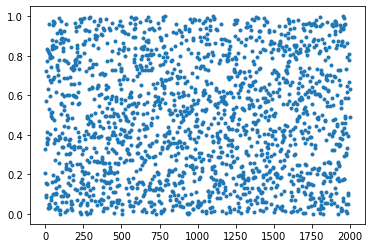

In [12]:
#теперь все значения от 0 до 1
plt.plot(trainX_1stripe['3'], '.')

Предыдущая модель дает более хороший результат:

In [13]:
X_train, X_val, y_train, y_val = train_test_split(trainX_1stripe, trainY_1stripe, test_size=0.25, random_state=42)
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
r2_score(y_val, y_pred)

0.5009781459120971

Найдем лучшую модель

Random Forest

In [14]:
rf=RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
r2_score(y_val, y_pred)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.46422374380728604

Градиентный бустинг

In [15]:
est = GradientBoostingRegressor()
est.fit(X_train, y_train)
y_pred = est.predict(X_val)
r2_score(y_val, y_pred) 

D:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5146819401603219

In [16]:
est = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.05, max_depth=3, subsample=0.9,
                                min_samples_leaf=100, max_features=0.05, random_state=42)
est.fit(X_train, y_train)
y_pred = est.predict(X_val)
r2_score(y_val, y_pred) 

D:\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7463485260708485

Стэкинг разных моделей

In [17]:
clsfrs = [
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=10000, learning_rate=0.05, max_depth=3, subsample=0.9,
                                min_samples_leaf=100, max_features=0.05, random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)),
    ('KNN', KNeighborsRegressor(n_neighbors=10)),
    ('Lasso', LassoCV()),
    
]
st = StackingRegressor(estimators=clsfrs, final_estimator=RidgeCV(), n_jobs=-1)
st.fit(X_train, y_train)
y_pred = st.predict(X_val)
r2_score(y_val, y_pred)

D:\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7712394084680461

SVR

In [18]:
svm = SVR(kernel='rbf', C=50)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
r2_score(y_val, y_pred)  

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7723056829772564

Видно что SVR дает лучший результат даже без особого подбора параметров и ансамблирования

Попробуем еще улучшить результат

Изучим данные с помощью PCA

Применим сначала к изначальным данным до обработки

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(trainX)
Z=pca.transform(trainX)

Видно что данные распадаются на 3 части: основная часть с центром в нуле и выбросы слева и справа от нее

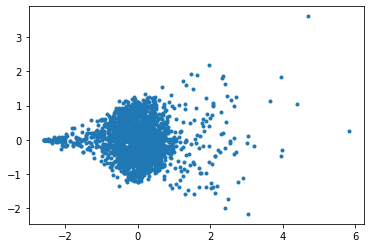

In [20]:
plt.plot(Z[:, 0], Z[:, 1], '.')

Если нарисовать график зависимости trainY от первого столбца Z то виден явный тренд

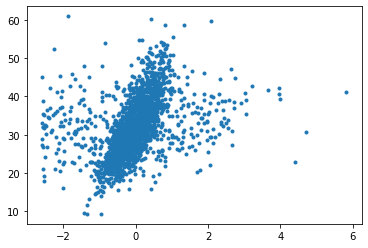

In [21]:
plt.plot(Z[:, 0], trainY, '.')

Применим PCA к обработанным ранее данным 

In [22]:
pca = PCA(n_components=2)
pca.fit(trainX_1stripe)
Z=pca.transform(trainX_1stripe)

Видно что удалось избавиться от части выбросов справа

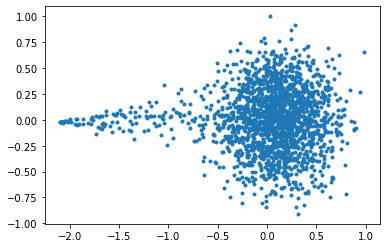

In [23]:
plt.plot(-Z[:, 0], Z[:, 1], '.')
#видимо в алгоритме ось получилась направлена в другую сторону, поэтому поставил минус чтобы картинка была похожа

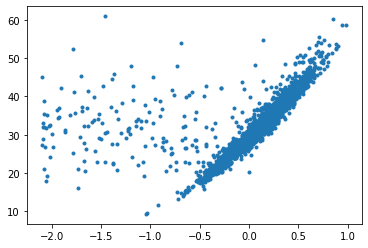

In [24]:
plt.plot(-Z[:, 0], trainY_1stripe, '.')

Уберем выбросы слева

In [25]:
#найдем номера выбросов
w=list(np.where(-Z[:, 0]<-1)[0])


In [26]:
#выбросим строки с этими номерами из выборки
trainX_nooutliers=trainX_1stripe.drop(trainX_1stripe.index[w])
trainY_nooutliers=trainY_1stripe.drop(trainY_1stripe.index[w])

Еще раз применим PCA к получившимся данным

In [27]:
pca = PCA(n_components=2)
pca.fit(trainX_nooutliers)
Z=pca.transform(trainX_nooutliers)

Выбросов не видно

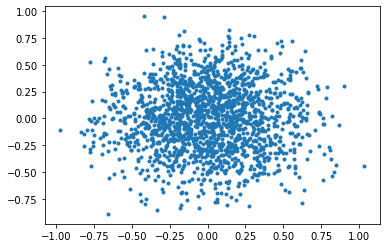

In [40]:
plt.plot(Z[:, 0], Z[:, 1], '.')

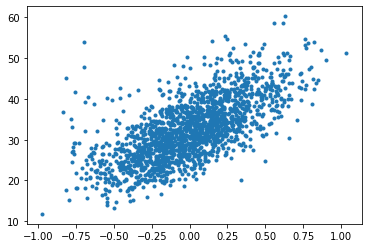

In [41]:
plt.plot(Z[:, 0], trainY_nooutliers, '.')

Проверим модель на новых данных

In [30]:
X_train_sum_mult, X_val_sum_mult, y_train_sum_mult, y_val_sum_mult = train_test_split(
    trainX_nooutliers, trainY_nooutliers, test_size=0.25, random_state=42)

In [31]:
svm = SVR(kernel='rbf', C=50)
svm.fit(X_train_sum_mult, y_train_sum_mult)
y_pred = svm.predict(X_val_sum_mult)
r2_score(y_val_sum_mult, y_pred)  

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8041275466469023

На всякий случай проверим еще кросс-валидацией

In [32]:
scores=cross_val_score(SVR(kernel='rbf', C=50), 
                       trainX_nooutliers, trainY_nooutliers, cv=5)
scores.mean()

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

0.8153744657880301

Получили прирост 

Добавим новые фичи: суммы и произведения всех фич

In [33]:
#посчитаем суммы
l=list()
for i in range(20):
    for j in range(i+1, 20):
        l.append((i,j))
        
trainX_mult=trainX_nooutliers.copy()
testX_mult=testX.copy()
for i, j in l:
    trainX_mult[str(i)+'x'+str(j)]=trainX_mult[str(i)]*trainX_mult[str(j)]
    testX_mult[str(i)+'x'+str(j)]=testX_mult[str(i)]*testX_mult[str(j)]
    
trainX_mult.head()

,0,1,2,3,4,5,6,7,8,9,...,15x16,15x17,15x18,15x19,16x17,16x18,16x19,17x18,17x19,18x19
Id,,,,,,,,,,,,,,,,,,,,,
0,0.929616,0.316376,0.183919,0.205408,0.567725,0.595545,0.964515,0.585655,0.723877,0.653570,...,0.531570,0.572506,0.633205,0.475035,0.706299,0.781184,0.586049,0.841342,0.631181,0.698101
1,0.642475,0.717454,0.467599,0.326935,0.439645,0.729689,0.994015,0.606902,0.764392,0.170914,...,0.313841,0.027343,0.471045,0.383254,0.030986,0.533801,0.434313,0.046507,0.037839,0.651863
2,0.818350,0.500223,0.810189,0.096366,0.218950,0.258719,0.468106,0.411885,0.685797,0.178053,...,0.073534,0.056671,0.127446,0.136832,0.184758,0.415498,0.446098,0.320215,0.343798,0.773158
4,0.945372,0.533232,0.252493,0.723851,0.367439,0.498648,0.226575,0.317016,0.629100,0.312933,...,0.306054,0.752606,0.817923,0.038902,0.277709,0.301811,0.014355,0.742173,0.035299,0.038363
5,0.195795,0.294501,0.627000,0.086581,0.142945,0.515827,0.689341,0.768072,0.625726,0.581619,...,0.625915,0.492504,0.654831,0.469793,0.334726,0.445050,0.319291,0.350190,0.251235,0.334041


In [34]:
#посчитаем произведения
l=list()
for i in range(20):
    for j in range(i+1, 20):
        l.append((i,j))
trainX_sum=trainX_nooutliers.copy()
testX_sum=testX.copy()
for i, j in l:
    trainX_sum[str(i)+'+'+str(j)]=trainX_sum[str(i)]+trainX_sum[str(j)]
for i, j in l:
    testX_sum[str(i)+'+'+str(j)]=testX_sum[str(i)]+testX_sum[str(j)]
trainX_sum.head()

,0,1,2,3,4,5,6,7,8,9,...,15+16,15+17,15+18,15+19,16+17,16+18,16+19,17+18,17+19,18+19
Id,,,,,,,,,,,,,,,,,,,,,
0,0.929616,0.316376,0.183919,0.205408,0.567725,0.595545,0.964515,0.585655,0.723877,0.653570,...,1.466224,1.528587,1.621059,1.380097,1.681988,1.774460,1.533498,1.836824,1.595861,1.688333
1,0.642475,0.717454,0.467599,0.326935,0.439645,0.729689,0.994015,0.606902,0.764392,0.170914,...,1.122621,0.578213,1.421345,1.254521,0.648324,1.491456,1.324632,0.947047,0.780224,1.623356
2,0.818350,0.500223,0.810189,0.096366,0.218950,0.258719,0.468106,0.411885,0.685797,0.178053,...,0.639810,0.527528,0.998785,1.061281,0.866972,1.338228,1.400724,1.225946,1.288442,1.759699
4,0.945372,0.533232,0.252493,0.723851,0.367439,0.498648,0.226575,0.317016,0.629100,0.312933,...,1.246781,1.737106,1.808826,0.953441,1.162436,1.234156,0.378770,1.724481,0.869096,0.940816
5,0.195795,0.294501,0.627000,0.086581,0.142945,0.515827,0.689341,0.768072,0.625726,0.581619,...,1.611886,1.472867,1.642017,1.449201,1.165432,1.334582,1.141766,1.195563,1.002747,1.171897


In [35]:
#соединим суммы и произведения в один dataframe
trainX_sum_mult=pd.concat([trainX_sum, trainX_mult.drop(columns=[str(i) for i in range(20)])], axis=1)
trainX_sum_mult
testX_sum_mult=pd.concat([testX_sum, testX_mult.drop(columns=[str(i) for i in range(20)])], axis=1)
trainX_sum_mult.head()

,0,1,2,3,4,5,6,7,8,9,...,15x16,15x17,15x18,15x19,16x17,16x18,16x19,17x18,17x19,18x19
Id,,,,,,,,,,,,,,,,,,,,,
0,0.929616,0.316376,0.183919,0.205408,0.567725,0.595545,0.964515,0.585655,0.723877,0.653570,...,0.531570,0.572506,0.633205,0.475035,0.706299,0.781184,0.586049,0.841342,0.631181,0.698101
1,0.642475,0.717454,0.467599,0.326935,0.439645,0.729689,0.994015,0.606902,0.764392,0.170914,...,0.313841,0.027343,0.471045,0.383254,0.030986,0.533801,0.434313,0.046507,0.037839,0.651863
2,0.818350,0.500223,0.810189,0.096366,0.218950,0.258719,0.468106,0.411885,0.685797,0.178053,...,0.073534,0.056671,0.127446,0.136832,0.184758,0.415498,0.446098,0.320215,0.343798,0.773158
4,0.945372,0.533232,0.252493,0.723851,0.367439,0.498648,0.226575,0.317016,0.629100,0.312933,...,0.306054,0.752606,0.817923,0.038902,0.277709,0.301811,0.014355,0.742173,0.035299,0.038363
5,0.195795,0.294501,0.627000,0.086581,0.142945,0.515827,0.689341,0.768072,0.625726,0.581619,...,0.625915,0.492504,0.654831,0.469793,0.334726,0.445050,0.319291,0.350190,0.251235,0.334041


Посмотрим на score на новых данных

In [36]:
X_train_sum_mult, X_val_sum_mult, y_train_sum_mult, y_val_sum_mult = train_test_split(
    trainX_sum_mult, trainY_nooutliers, test_size=0.25, random_state=42)

In [37]:
svm = SVR(kernel='rbf', C=50)
svm.fit(X_train_sum_mult, y_train_sum_mult)
y_pred = svm.predict(X_val_sum_mult)
r2_score(y_val_sum_mult, y_pred)  

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8244924898408336

In [38]:
scores=cross_val_score(SVR(kernel='rbf', C=50), 
                       trainX_sum_mult, trainY_nooutliers, cv=5)
scores.mean()

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

0.8421691963885358

Получим еще прирост

Натренируем модель на всех имеющихся данных и получим результат для соревнования

In [39]:
svm = SVR(kernel='rbf', C=50)
svm.fit(trainX_sum_mult, trainY_nooutliers)
submission = svm.predict(testX_sum_mult)
#submissionpd = pd.DataFrame({'Value' : Y})
#submissionpd['Id'] = range(len(Ypd))
#submissionpd.to_csv('submission.csv', index=False)


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
